In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('/kaggle/input/netflix-tv-shows-and-movies/titles.csv')
df.head( )
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [24]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [3]:
df.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [31]:
import numpy as np

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Then optionally fill or drop them
df.fillna(0, inplace=True)  # or df.dropna()


*No missing or null value found*

In [4]:
# exploring summary statistics
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


<h1> --------- SUMMARY --------</h1> 

1. We have a dataframe consisting of total 5850 rows and 15 columns.
2. Our datset looks little bit tidy with no Nans and nor duplicated values.
3.  Description , age certification , production countries and seasons won't be so useful in our analysis so we will be dropping them.
4.  imdb votes can be better categorized for proper analysis.
5.  Genres are having extra space after comma that need to be removed to make it look clean. 

In [32]:
df.head()

,id,title,type,release_year,runtime,genres,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,51,[documentation],0,0.0,0.0,0.600,0.000
1,tm84618,Taxi Driver,MOVIE,1976,114,0,tt0075314,8.2,808582.0,40.965,8.179
2,tm84618,Taxi Driver,MOVIE,1976,114,0,tt0075314,8.2,808582.0,40.965,8.179
3,tm154986,Deliverance,MOVIE,1972,109,0,tt0068473,7.7,107673.0,10.010,7.300
4,tm154986,Deliverance,MOVIE,1972,109,action,tt0068473,7.7,107673.0,10.010,7.300


<h3> categorizing Vote_Average column</h3>

<h4> We would cut the Vote_Average values and make 4 categories: popular average
below_avg not_popular to describe it more using catigorize_col() function
provided above.
</h4>

In [38]:
def categorize_col (df, col, labels):
 """
 categorizes a certain column based on its quartiles

 Args:
 (df) df - dataframe we are proccesing
 (col) str - to be catigorized column's name
 (labels) list - list of labels from min to max

 Returns:
 (df) df - dataframe with the categorized col
 """

 # setting the edges to cut the column accordingly
 edges = [df[col].describe()['min'],
 df[col].describe()['25%'],
 df[col].describe()['50%'],
 df[col].describe()['75%'],
 df[col].describe()['max']]
 df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
 return df

In [39]:
# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
# categorize column based on labels and edges
categorize_col(df, 'imdb_score', labels)
# confirming changes
df['imdb_score'].unique()

[NaN, 'popular', 'below_avg', 'average', 'not_popular']
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [40]:
df.head()

,id,title,type,release_year,runtime,genres,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,51,NaN,0,NaN,0.0,0.600,0.000
1,tm84618,Taxi Driver,MOVIE,1976,114,NaN,tt0075314,popular,808582.0,40.965,8.179
2,tm84618,Taxi Driver,MOVIE,1976,114,NaN,tt0075314,popular,808582.0,40.965,8.179
3,tm154986,Deliverance,MOVIE,1972,109,NaN,tt0068473,popular,107673.0,10.010,7.300
4,tm154986,Deliverance,MOVIE,1972,109,action,tt0068473,popular,107673.0,10.010,7.300


In [43]:
# showing stats. on genre column
df['imdb_score'].describe()

count         14399
unique            4
top       below_avg
freq           4239
Name: imdb_score, dtype: object

In [44]:
df['imdb_score'].count()

14399

<h1> ------- DATA CLEANING INITIATED -------- </h1>

<h3>Dropping "Description" , " age certification" ,"production countries" ,"seasons"</h3>

In [9]:
#making list of Colmn to be dropped
colm = ['description','age_certification','production_countries','seasons']

# dropping columns and confirming changes
df.drop(colm, axis = 1, inplace = True)
df.columns

Index(['id', 'title', 'type', 'release_year', 'runtime', 'genres', 'imdb_id',
       'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [33]:
df.head()

,id,title,type,release_year,runtime,genres,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,51,[documentation],0,0.0,0.0,0.600,0.000
1,tm84618,Taxi Driver,MOVIE,1976,114,0,tt0075314,8.2,808582.0,40.965,8.179
2,tm84618,Taxi Driver,MOVIE,1976,114,0,tt0075314,8.2,808582.0,40.965,8.179
3,tm154986,Deliverance,MOVIE,1972,109,0,tt0068473,7.7,107673.0,10.010,7.300
4,tm154986,Deliverance,MOVIE,1972,109,action,tt0068473,7.7,107673.0,10.010,7.300


**we'd split genres into a list and then
explode our dataframe to have only one
genre per row for ezch movie**

In [34]:
# split the strings into lists
df['genres'] = df['genres'].str.split(', ')
# explode the lists
df = df.explode('genres').reset_index(drop=True)
df.head()


,id,title,type,release_year,runtime,genres,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,51,NaN,0,0.0,0.0,0.600,0.000
1,tm84618,Taxi Driver,MOVIE,1976,114,NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm84618,Taxi Driver,MOVIE,1976,114,NaN,tt0075314,8.2,808582.0,40.965,8.179
3,tm154986,Deliverance,MOVIE,1972,109,NaN,tt0068473,7.7,107673.0,10.010,7.300
4,tm154986,Deliverance,MOVIE,1972,109,action,tt0068473,7.7,107673.0,10.010,7.300


In [12]:
# casting column into category
df['genres'] = df['genres'].astype('category')
# confirming changes
df['genres'].dtypes


CategoricalDtype(categories=[''action'', ''action']', ''animation'', ''animation']',
                  ''comedy'', ''comedy']', ''crime'', ''crime']',
                  ''documentation'', ''documentation']', ''drama'', ''drama']',
                  ''european'', ''european']', ''family'', ''family']',
                  ''fantasy'', ''fantasy']', ''history'', ''history']',
                  ''horror'', ''horror']', ''music'', ''music']', ''reality'',
                  ''reality']', ''romance'', ''romance']', ''scifi'',
                  ''scifi']', ''sport'', ''sport']', ''thriller'',
                  ''thriller']', ''war'', ''war']', ''western'', ''western']',
                  '['action'', '['action']', '['animation'', '['animation']',
                  '['comedy'', '['comedy']', '['crime'', '['crime']',
                  '['documentation'', '['documentation']', '['drama'',
                  '['drama']', '['family'', '['family']', '['fantasy'',
                  '['fantasy']', '['his

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15147 entries, 0 to 15146
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               15147 non-null  object  
 1   title            15146 non-null  object  
 2   type             15147 non-null  object  
 3   release_year     15147 non-null  int64   
 4   runtime          15147 non-null  int64   
 5   genres           15147 non-null  category
 6   imdb_id          14525 non-null  object  
 7   imdb_score       14399 non-null  float64 
 8   imdb_votes       14375 non-null  float64 
 9   tmdb_popularity  14995 non-null  float64 
 10  tmdb_score       14614 non-null  float64 
dtypes: category(1), float64(4), int64(2), object(4)
memory usage: 1.2+ MB


In [14]:
df.nunique()

id                 5850
title              5798
type                  2
release_year         63
runtime             202
genres               73
imdb_id            5447
imdb_score           80
imdb_votes         3880
tmdb_popularity    4889
tmdb_score          394
dtype: int64

<h4>Now , our dataset is clean and tidy, we are left with a total of 11 columns and 18828
rows to dig into during our analysis.</h4>

<h1>Data Visualization  </h1>

<h3> Here, we'd use Matplotlib and seaborn for making some informative visuals to gain
insights abut our data.</h3>

In [15]:
# setting up seaborn configurations
sns.set_style('whitegrid')

<h1> Q1: What is the most frequent genre in
the dataset? </h1>

In [45]:
# showing stats. on genre column
df['genres'].describe()

count      4937
unique       19
top       drama
freq        883
Name: genres, dtype: object

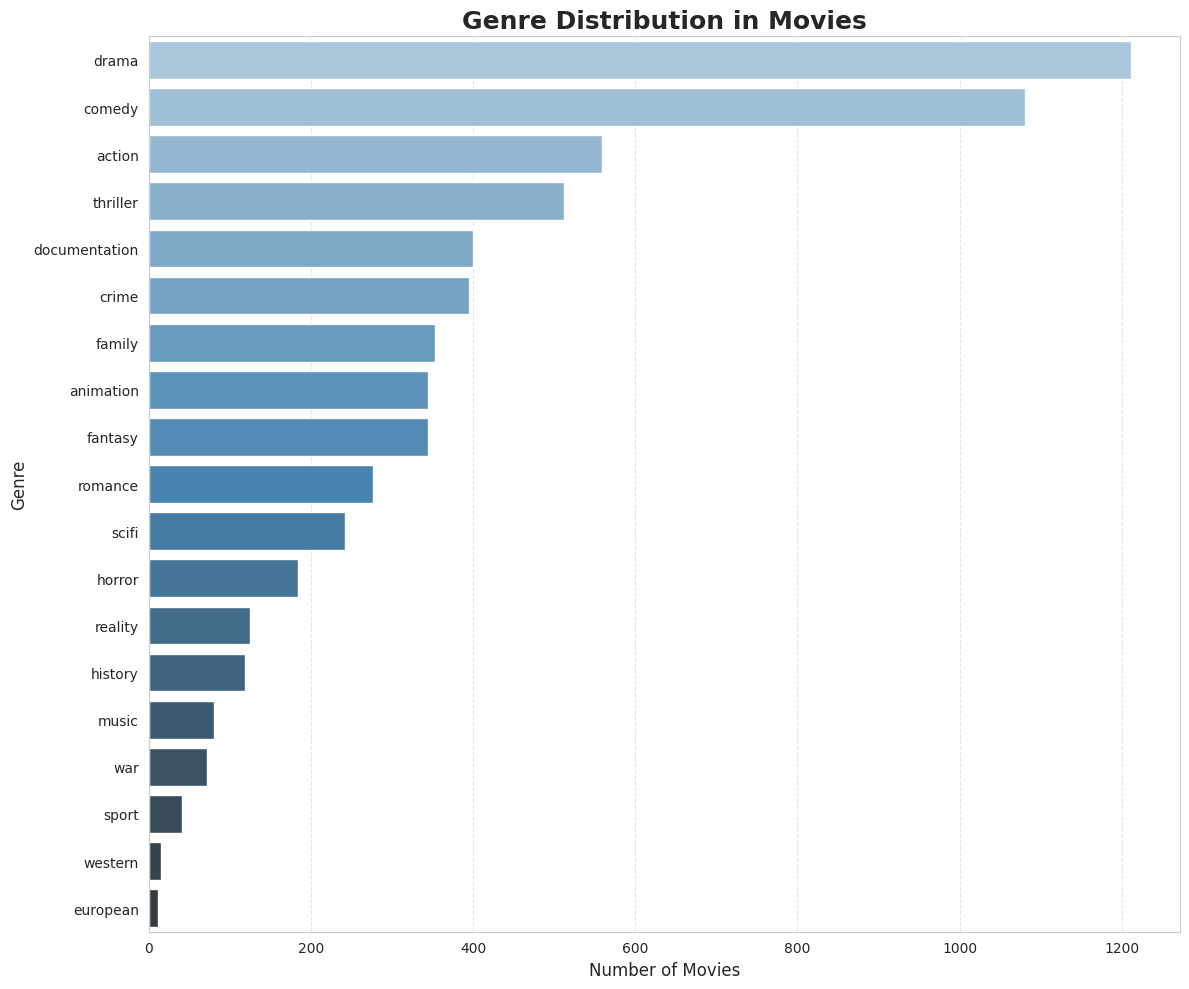

In [21]:
import ast

def safe_eval(val):
    try:
        return ast.literal_eval(val)
    except:
        return None

# Apply safely only to strings that look like lists
df['genres'] = df['genres'].astype(str).apply(safe_eval)

# Drop rows where parsing failed (None)
df_cleaned = df.dropna(subset=['genres'])

# Explode to individual genre rows
df_exploded = df_cleaned.explode('genres')

# Count frequencies
genre_counts = df_exploded['genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.barplot(data=genre_counts, y='Genre', x='Count', palette='Blues_d')

plt.title('Genre Distribution in Movies', fontsize=18, weight='bold')
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



<h3> We can notice from the above visual that Drama genre is the most frequent genre
in our dataset and has appeared more than 17% of the times among 19 other
genres. </h3>


<h1> Q2: What genres has highest votes ? </h1>

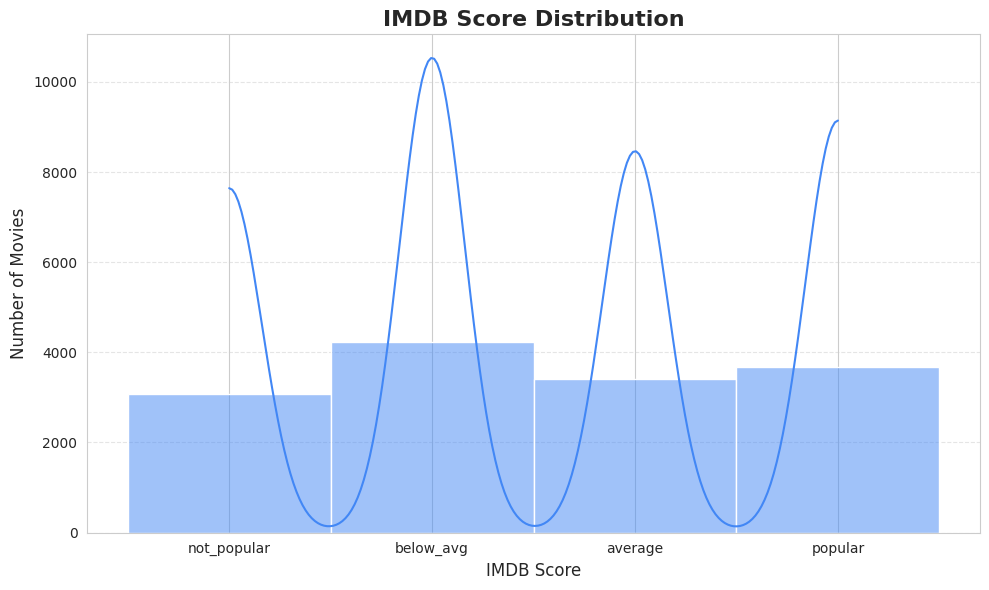

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove missing or invalid scores
df_cleaned = df[df['imdb_score'].notna()]

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_cleaned,
    x='imdb_score',
    bins=20,
    color='#4287f5',
    kde=True
)

plt.title('IMDB Score Distribution', fontsize=16, weight='bold')
plt.xlabel('IMDB Score', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<h1>Q3: Which movie got the highest imdb vote ? what's its
genre ?</h1>

In [27]:
# checking max popularity in dataset
df[df['imdb_votes'] == df['imdb_votes'].max()]

,id,title,type,release_year,runtime,genres,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
667,tm92641,Inception,MOVIE,2010,148,None,tt1375666,8.8,2294231.0,108.284,8.4
668,tm92641,Inception,MOVIE,2010,148,scifi,tt1375666,8.8,2294231.0,108.284,8.4
669,tm92641,Inception,MOVIE,2010,148,music,tt1375666,8.8,2294231.0,108.284,8.4
670,tm92641,Inception,MOVIE,2010,148,None,tt1375666,8.8,2294231.0,108.284,8.4


<h1>Q4: Which movie got the lowest popularity? what's
its release year?</h1>

In [36]:
# checking min popularity in dataset

df[df['imdb_votes'] == df['imdb_votes'].min()]


,id,title,type,release_year,runtime,genres,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,51,NaN,0,0.0,0.0,0.600,0.0
192,tm132164,Bill Hicks: Sane Man,MOVIE,1989,80,NaN,0,0.0,0.0,3.377,7.5
413,ts251477,My First Errand,SHOW,1991,18,NaN,0,0.0,0.0,7.730,7.8
414,ts251477,My First Errand,SHOW,1991,18,family,0,0.0,0.0,7.730,7.8
415,ts251477,My First Errand,SHOW,1991,18,NaN,0,0.0,0.0,7.730,7.8
...,...,...,...,...,...,...,...,...,...,...,...
15075,tm1225897,Social Man,MOVIE,2021,96,NaN,tt20198164,0.0,0.0,0.000,0.0
15120,ts307884,HQ Barbers,SHOW,2021,24,NaN,0,0.0,0.0,0.840,0.0
15130,tm1216735,Sun of the Soil,MOVIE,2022,26,NaN,0,0.0,0.0,1.179,7.0
15138,tm1074617,Bling Empire - The Afterparty,MOVIE,2021,35,NaN,0,0.0,0.0,0.000,0.0


<h1>Q5: Which year has the most filmmed movies?</h1>

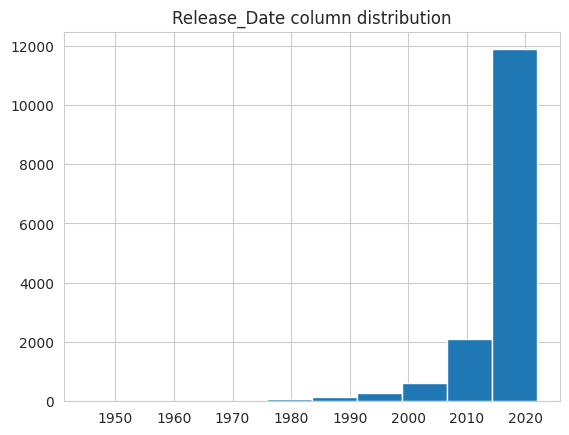

In [30]:
df['release_year'].hist()
plt.title('Release_Date column distribution')
plt.show()






<h1>                    -------------------------  Conclusion --------------------------               
</h1>




<h3> Q1: What is the most frequent genre in the dataset?</h3>
<h4> "Drama" genre is the most frequent genre in our dataset and has appeared more than
17% of the times among 19 other genres.
    
</h4>
<h3> Q2: What genres has highest votes ?</h3>
<h4> we have 34.95% of our dataset with popular vote. "Drama" again gets the
highest popularity among fans by being having more than other movies popularities</h4>

<h3> Q3: Which movie got the highest popularity ? what's its genre ?</h3>
<h4> "Inception" has the highest popularity rate in our dataset and it has
genres of "Sci-Fi" , "none" and "music" .
</h4>

<h3> Q4: Which movie got the lowest popularity ? what's its release year ?</h3>
<h4> 'Five Came Back: The Reference Films', 'Bill Hicks: Sane Man' and 'My First Errand' has the lowest rate in our dataset
and it has release year of '1945' , '1989' and  '1991'.</h4>

<h3> Q5: Which year has the most filmmed movies?</h3>
<h4> Year '2020'  has the highest filmming rate in our dataset.</h4>

